In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
top2vec_plot_path = "/content/drive/MyDrive/Tesi/Plots/Top2Vec/top2vec_"
plot_path = "/content/drive/MyDrive/Tesi/Plots/Comparisons/comparisons_"
radar_chart_path = "/content/drive/MyDrive/Tesi/Plots/Comparisons/RadarChart/"

# Importing libraries

In [3]:
%%capture
# ! pip install matplotlib --upgrade
# import matplotlib
# matplotlib.__version__

In [4]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 127 kB/s 


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.patches import Patch
import plotly.graph_objects as go

import numpy as np
from math import log
import csv

import os
from os import listdir
from os.path import isfile, join

import seaborn as sns
import pandas as pd

# Plot results

## Different embeddings for Top2Vec results

### Initializing dictionaries of results

In [ ]:
# Tourpedia
# Test 1: {'num_topics': 14.0, 'diversity': 0.6646508527162551, 'irbo': 0.9248580358082984, 'c_npmi': -0.3392723909802706, 'c_uci': -10.056536471064778, 'c_umass': -12.516059682918238, 'c_v': 0.379202571898987}
# Test 2: {'num_topics': 10.4, 'diversity': 0.7504423419717537, 'irbo': 0.9288156296675032, 'c_npmi': -0.3417446746074659, 'c_uci': -10.11468118542824, 'c_umass': -12.148202390495069, 'c_v': 0.36091933308035257}
# Test 3: {'num_topics': 12.5, 'diversity': 0.71320497265892, 'irbo': 0.9304003475795326, 'c_npmi': -0.3399417248539535, 'c_uci': -10.079341668060895, 'c_umass': -12.081265859669452, 'c_v': 0.3555298552962292}
# Test 4: {'num_topics': 12.3, 'diversity': 0.6846377960275019, 'irbo': 0.9106581607350994, 'c_npmi': -0.34269620545276597, 'c_uci': -10.16429263023584, 'c_umass': -12.16444391412844, 'c_v': 0.36720958202546217}
# Test 5: {'num_topics': 50.6, 'diversity': 0.43127279744684294, 'irbo': 0.9076632542079567, 'c_npmi': -0.26074473164358536, 'c_uci': -8.02860455569444, 'c_umass': -9.385186098046553, 'c_v': 0.3579163859461168}
# Test 6: {'num_topics': 46.5, 'diversity': 0.5575727956399951, 'irbo': 0.9638680338482104, 'c_npmi': -0.2228302327630239, 'c_uci': -6.835665010150363, 'c_umass': -8.038410827137188, 'c_v': 0.35506224804263414}

In [ ]:
# Tourpedia deep-learn
#{'num_topics': 123.4, 'diversity': 0.28649124548294214, 'irbo': 0.9701924439751174, 'c_npmi': -0.2712415644313974, 'c_uci': -8.475234117271949, 'c_umass': -9.693998767110182, 'c_v': 0.3605059974423493}

In [ ]:
# Easytour deep-learn
#{'num_topics': 123.8, 'diversity': 0.28380105658599053, 'irbo': 0.9697045264941497, 'c_npmi': -0.2683759385708016, 'c_uci': -8.42199554359335, 'c_umass': -9.803253199524882, 'c_v': 0.3629542872232882}

In [ ]:
#Easytour speed=learn
doc_vec_chunk = {'num_topics': 41.5, 'diversity': 0.865787350177861, 'irbo': 0.9959754211984789, 'c_npmi': -0.1373683685997297, 'c_uci': -5.278008290149552, 'c_umass': -7.346481654847873, 'c_v': 0.5107702127978502}
doc_vec_no_chunk = {'num_topics': 50.7, 'diversity': 0.8315862370323801, 'irbo': 0.9949932208814929, 'c_npmi': -0.09789133017186936, 'c_uci': -4.493559342240369, 'c_umass': -5.202886553951696, 'c_v': 0.570103538736817}
test3 = {'num_topics': 41.9, 'diversity': 0.857653229530839, 'irbo': 0.9952818727994963, 'c_npmi': -0.12757823751725722, 'c_uci': -5.13572903976611, 'c_umass': -6.378286760702936, 'c_v': 0.5243180559056222}
test4 = {'num_topics': 48.9, 'diversity': 0.8391012828303197, 'irbo': 0.9949673000496653, 'c_npmi': -0.10066076245349853, 'c_uci': -4.542946713800365, 'c_umass': -5.458728659514632, 'c_v': 0.5621089896458603}
sentence_encoder = {'num_topics': 2.0, 'diversity': 1.0, 'irbo': 1.0, 'c_npmi': -0.2541045060224748, 'c_uci': -7.217034673229368, 'c_umass': -10.098948792556012, 'c_v': 0.4286507949183339}
distiluse = {'num_topics': 29.8, 'diversity': 0.7368369980667648, 'irbo': 0.9793781272692582, 'c_npmi': -0.2675844795100995, 'c_uci': -8.059502033645327, 'c_umass': -7.989346599207755, 'c_v': 0.35477216072877116}

In [ ]:
# Easytour doc2vec deep-learn with no chunking
# Results-> td: 0.9 IRBO: 0.9969803964614286 npmi: -0.17218274910710218 uci: -6.143046945079111 umass: -6.782536948865163 c_v: 0.478452525318317
# Results-> td: 0.9266666666666666 IRBO: 0.9980138967565585 npmi: -0.1262307584416638 uci: -5.166784660056625 umass: -6.033476898147242 c_v: 0.5281934764433523
# Results-> td: 0.8962962962962963 IRBO: 0.997261164575292 npmi: -0.13476882494022077 uci: -5.364664275221608 umass: -6.03478825342013 c_v: 0.52714363410314
# Results-> td: 0.8877551020408163 IRBO: 0.996890229005266 npmi: -0.1252239580496042 uci: -5.163742620715894 umass: -5.483270786795056 c_v: 0.5413164052220533
# Results-> td: 0.9153846153846154 IRBO: 0.997063010873742 npmi: -0.15795704686052067 uci: -5.812196651383993 umass: -6.836945344210743 c_v: 0.4816398346041236
test_dl_no_chunk = {'num_topics': 45.4, 'diversity': 0.905220536077679, 'irbo': 0.9972417395344573, 'c_npmi': -0.1432726674798223, 'c_uci': -5.530087030491446, 'c_umass': -6.234203646287667, 'c_v': 0.5113491751381972}

In [ ]:
# Easytour doc2vec deep-learn with chunking
# Results-> td: 0.8914893617021277 IRBO: 0.9971656709206819 npmi: -0.1308487926208886 uci: -5.30194766131722 umass: -5.476412877646203 c_v: 0.5422392622097317
# Results-> td: 0.8956521739130435 IRBO: 0.9971722130667081 npmi: -0.13382085219687098 uci: -5.304492885602258 umass: -5.681009558797488 c_v: 0.5371819134275122
# Results-> td: 0.9116279069767442 IRBO: 0.9975708717033934 npmi: -0.11670049879932072 uci: -4.966533465069488 umass: -5.760114393502795 c_v: 0.5478441614545319
# Results-> td: 0.9116279069767442 IRBO: 0.9973832734166588 npmi: -0.12473164857937653 uci: -5.131525276959297 umass: -5.788160305228256 c_v: 0.5451890537422714
# Results-> td: 0.8916666666666667 IRBO: 0.9970114593511589 npmi: -0.1297155512050485 uci: -5.2463290112138345 umass: -5.890849690840945 c_v: 0.5357541992927977

In [ ]:
t1 = {"diversity": 0.8914893617021277, "irbo": 0.9971656709206819, "c_npmi": -0.1308487926208886, "c_uci": -5.30194766131722, "c_umass": -5.476412877646203, "c_v": 0.5422392622097317}
t2 =  {"diversity": 0.8956521739130435, "irbo": 0.9971722130667081, "c_npmi": -0.13382085219687098, "c_uci": -5.304492885602258, "c_umass": -5.681009558797488, "c_v": 0.5371819134275122}
t3 = {"diversity": 0.9116279069767442, "irbo": 0.9975708717033934, "c_npmi": -0.11670049879932072, "c_uci": -4.966533465069488, "c_umass": -5.760114393502795, "c_v": 0.5478441614545319}
t4 =  {"diversity": 0.9116279069767442, "irbo": 0.9973832734166588, "c_npmi": -0.12473164857937653, "c_uci": -5.131525276959297, "c_umass": -5.788160305228256, "c_v": 0.5451890537422714}
t5 = {"diversity": 0.8916666666666667, "irbo": 0.9970114593511589, "c_npmi": -0.1297155512050485, "c_uci": -5.2463290112138345, "c_umass": -5.890849690840945, "c_v": 0.5357541992927977}
metrics = ["diversity", "irbo", "c_npmi", "c_uci", "c_umass", "c_v"]
t = [t1,t2,t3,t4,t5]
test_dl_chunk = dict()
for m in metrics:
  test_dl_chunk[m] = 0

for m in metrics:
  for i in range(len(t)):
    test_dl_chunk[m] += t[i][m]

for j in test_dl_chunk.keys():
  test_dl_chunk[j] = test_dl_chunk[j]/len(t)

print(test_dl_chunk)

{'diversity': 0.9004128032470653, 'irbo': 0.9972606976917202, 'c_npmi': -0.12716346868030107, 'c_uci': -5.190165660032419, 'c_umass': -5.719309365203137, 'c_v': 0.541641718025369}


### Plots

In [ ]:
metrics = ["diversity", "irbo", "c_npmi", "c_uci", "c_umass", "c_v"]
tests_done = [doc_vec_chunk, doc_vec_no_chunk, test_dl_chunk, test_dl_no_chunk, sentence_encoder, distiluse]
test_str = ["Doc2Vec with chunking", "Doc2Vec without chunking", "deeplearn with chunking", "deeplearn without chunking", "sentence encoder", "distiluse"]

In [ ]:
cols = ["model", "c_uci", "c_v",	"c_npmi",	"c_umass",	"diversity",	"irbo"]
tests_list = []
for i,j in zip(tests_done, test_str):
  t = [j]
  for v in cols:
    if v == "model":
      continue
    t.append(i[v])
  tests_list.append(t)

tests_df = pd.DataFrame(tests_list, columns = cols)
tests_df

,model,c_uci,c_v,c_npmi,c_umass,diversity,irbo
0,Doc2Vec with chunking,-5.278008,0.510770,-0.137368,-7.346482,0.865787,0.995975
1,Doc2Vec without chunking,-4.493559,0.570104,-0.097891,-5.202887,0.831586,0.994993
2,deeplearn with chunking,-5.190166,0.541642,-0.127163,-5.719309,0.900413,0.997261
3,deeplearn without chunking,-5.530087,0.511349,-0.143273,-6.234204,0.905221,0.997242
4,sentence encoder,-7.217035,0.428651,-0.254105,-10.098949,1.000000,1.000000
5,distiluse,-8.059502,0.354772,-0.267584,-7.989347,0.736837,0.979378


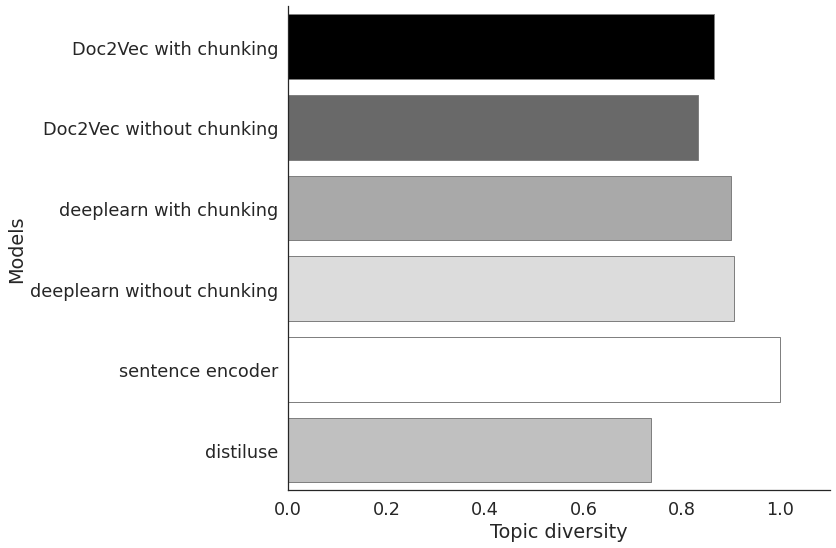

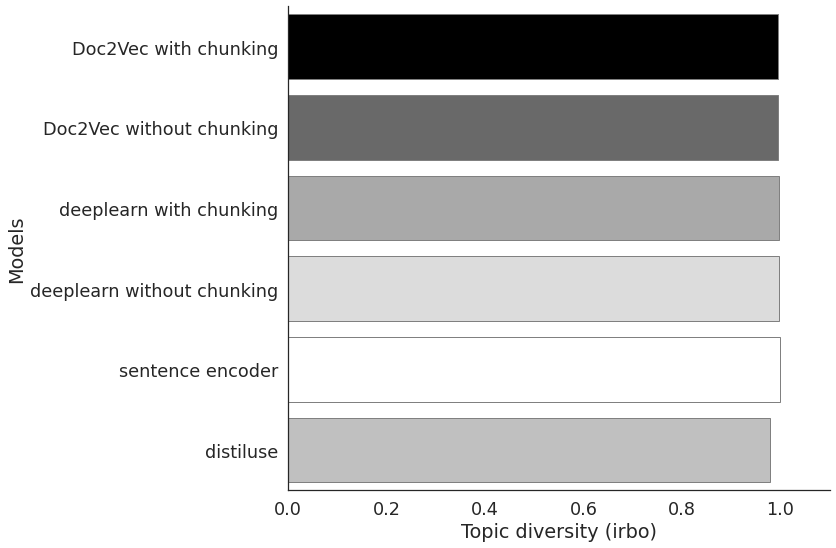

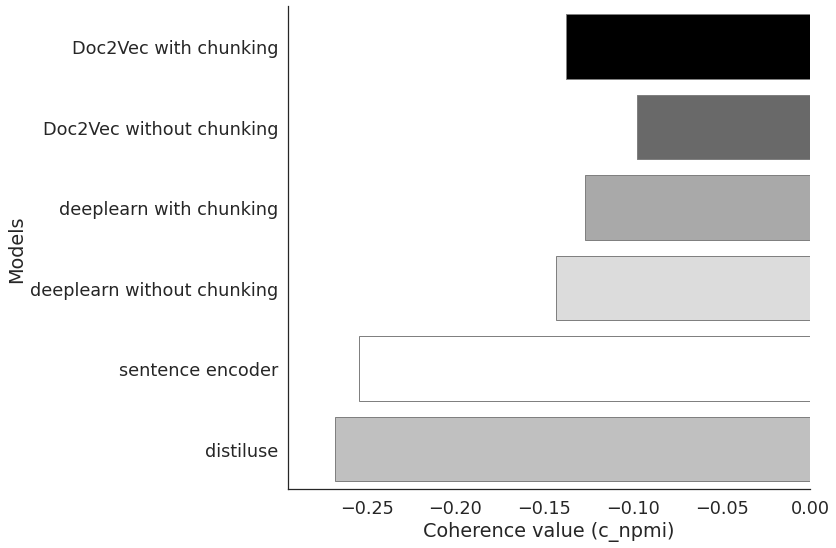

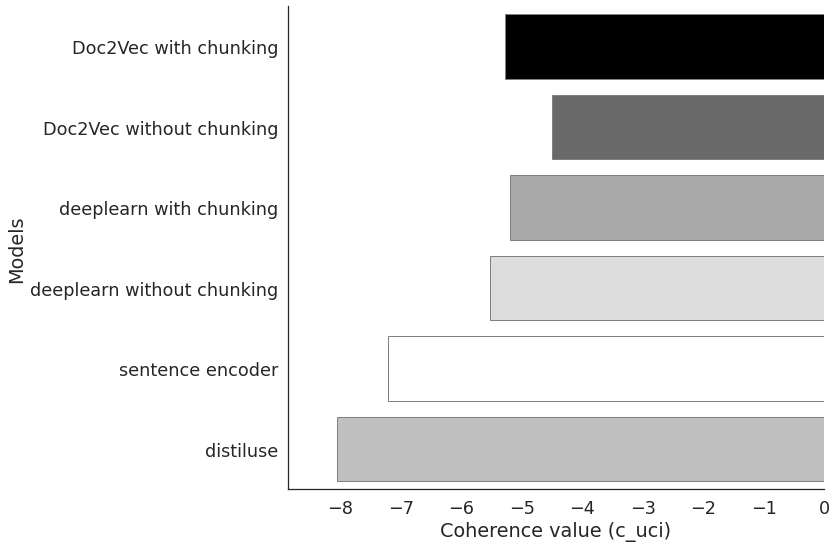

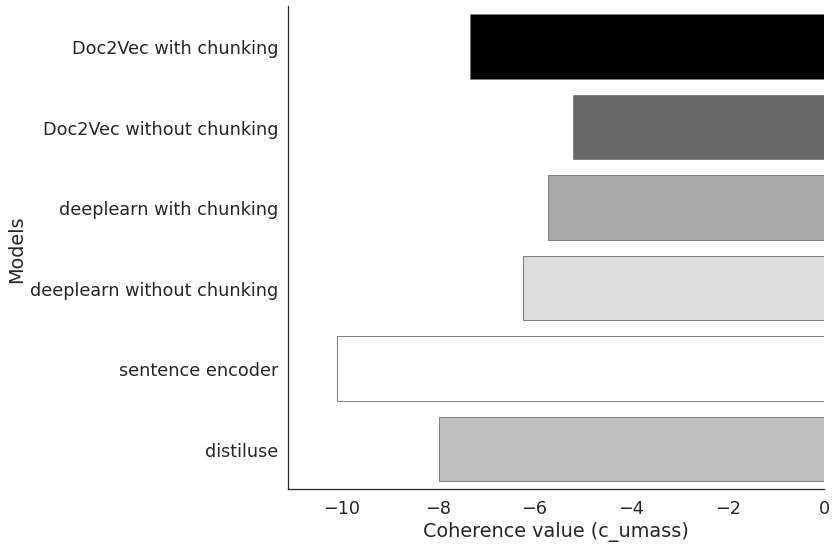

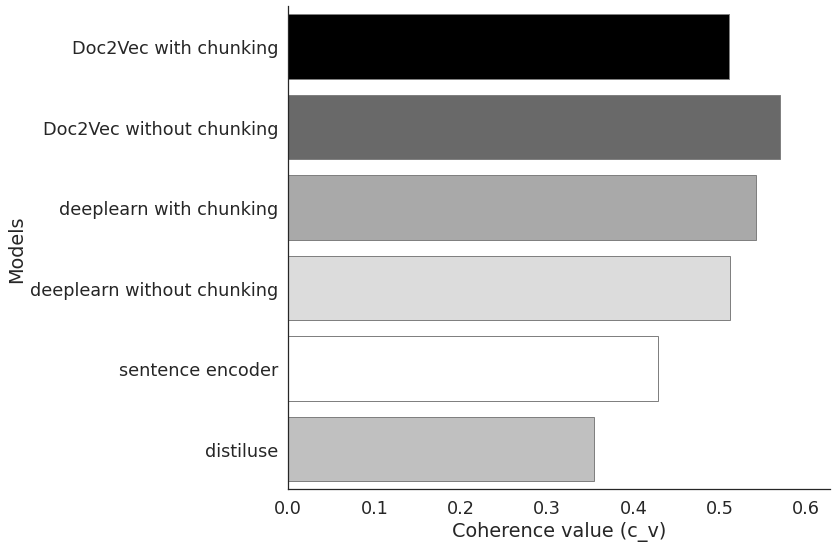

In [ ]:
colors = ["black", "dimgray", "darkgrey", "gainsboro", "white", "silver"]

sns.set(style='white', rc={'figure.figsize':(12,8)}, font_scale=1.6)
m = "c_uci"
for i,m in enumerate(metrics):
  plt.figure()
  plt.margins(x=0.1)
  
  s = sns.barplot(y="model", x=m, data=tests_df, orient="h", palette = colors, edgecolor=".5")
  plt.ylabel("Models")#, fontdict={"fontsize":15})

  if m == "irbo":
    plt.xlabel("Topic diversity ({})".format(m))#, fontdict={"fontsize":15})
  elif m == "diversity":
    plt.xlabel("Topic diversity")#, fontdict={"fontsize":15})
  else:
    plt.xlabel("Coherence value ({})".format(m))#, fontdict={"fontsize":15})
    
  # add bar values
  # for bars_group in s.containers:
  #   s.bar_label(bars_group, padding=3, fontsize=10)

  #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))#, fontsize=15)
  sns.despine()
  plt.tight_layout()
  plt.savefig(top2vec_plot_path+m+'_seaborn.png')

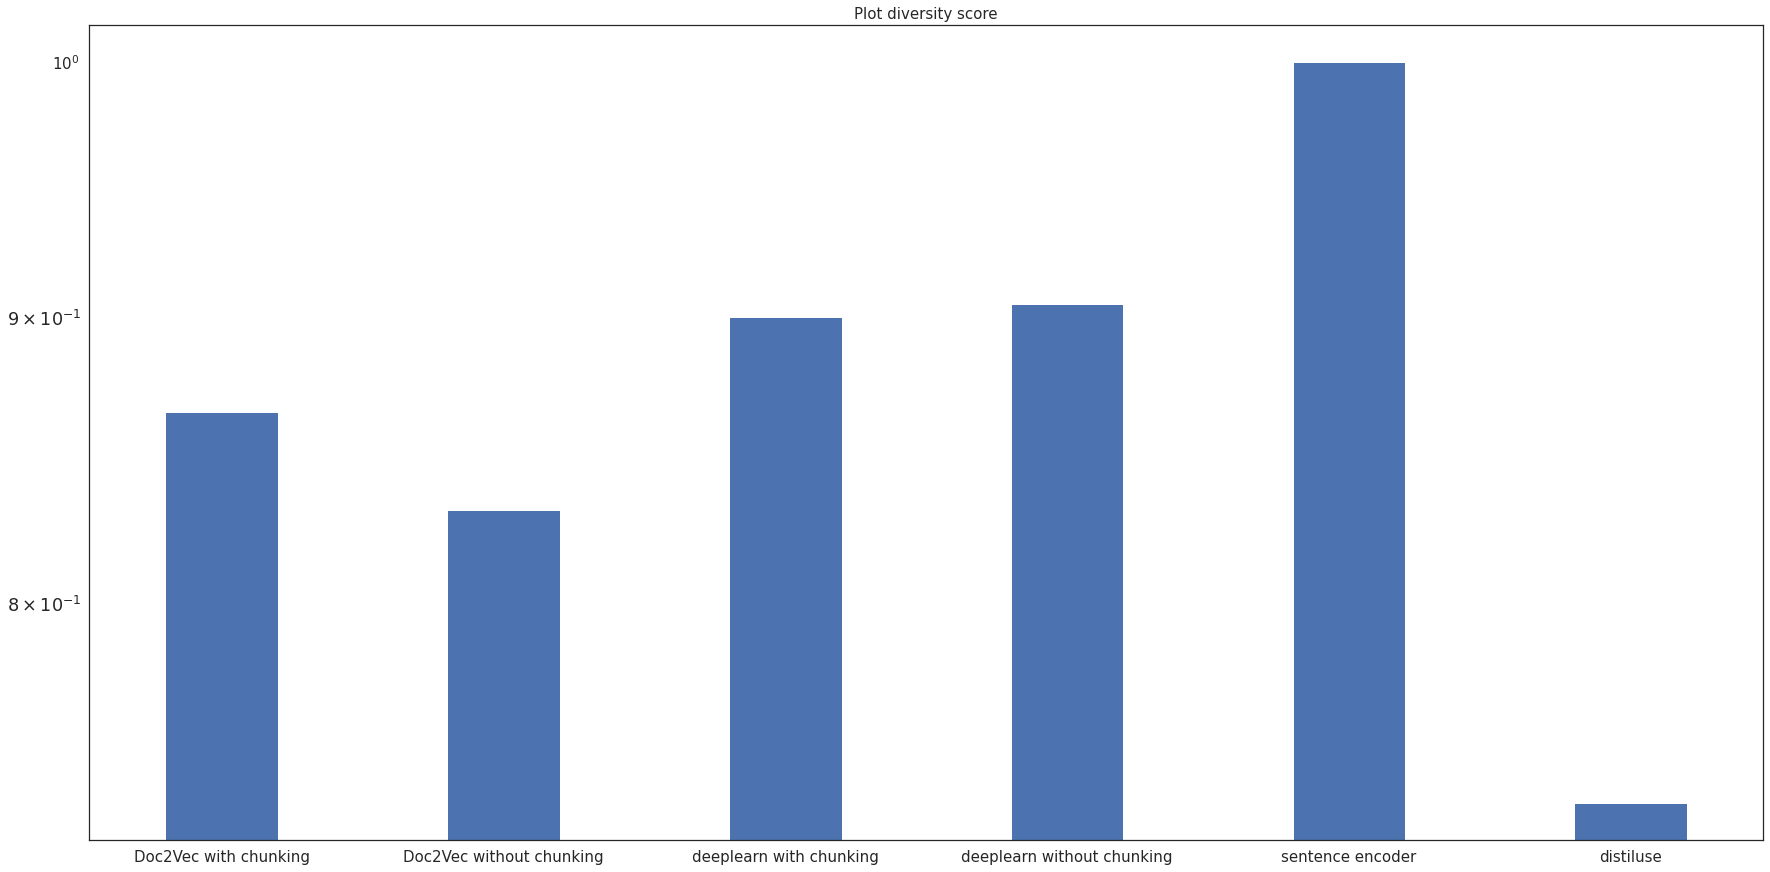

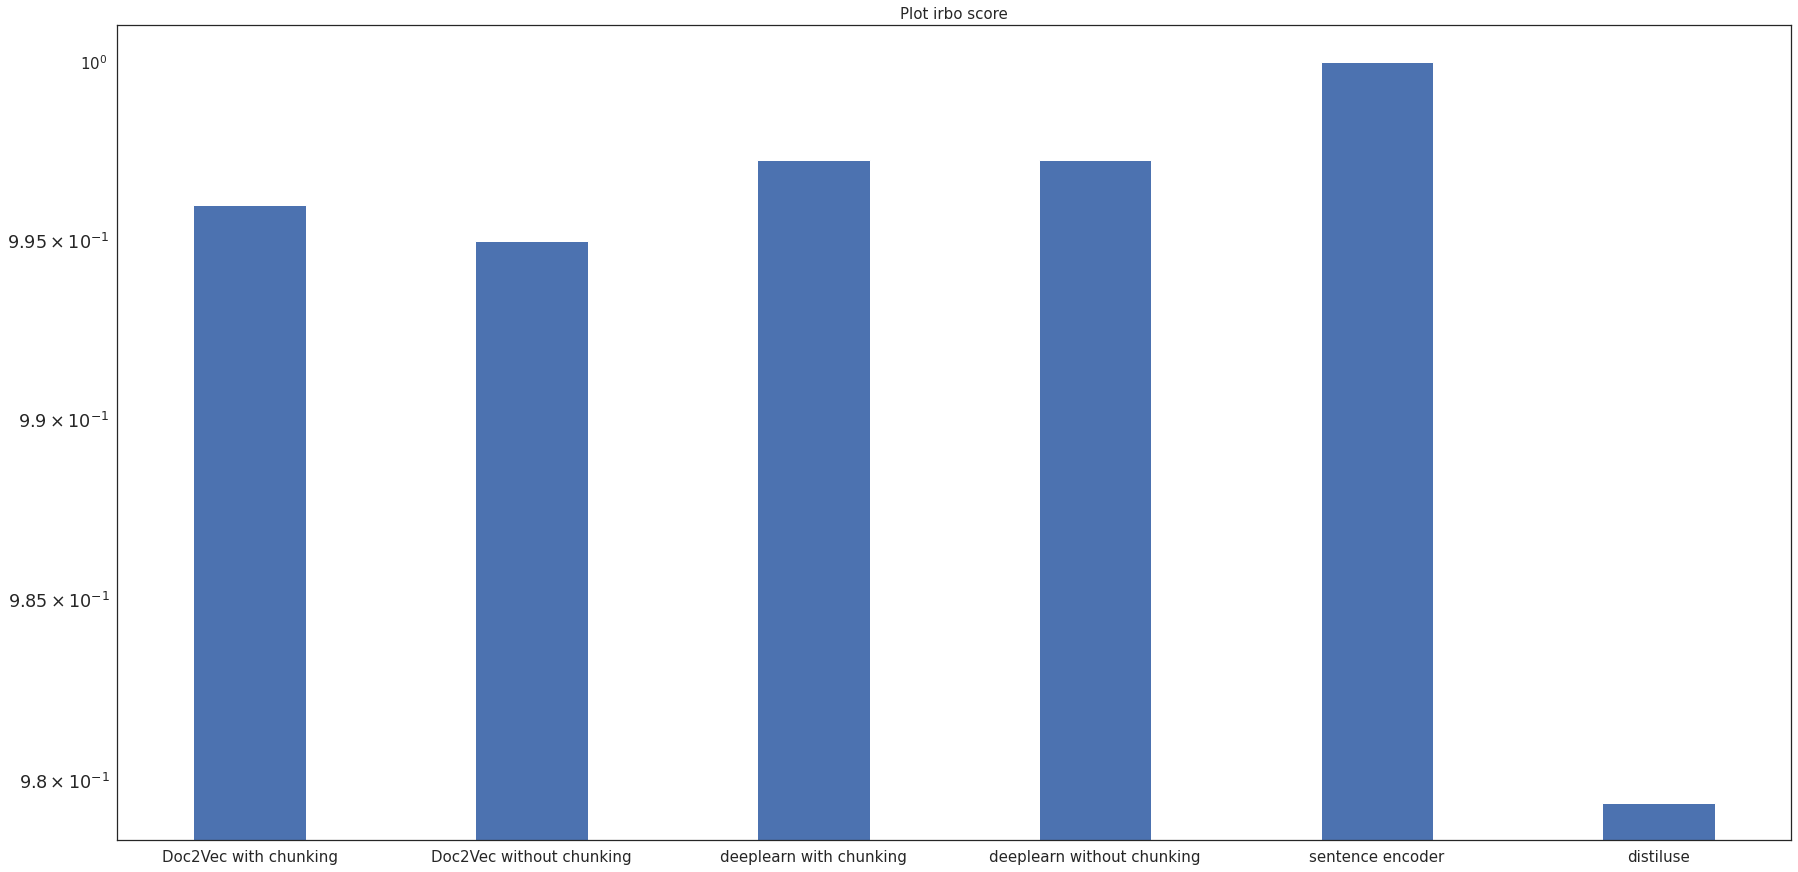

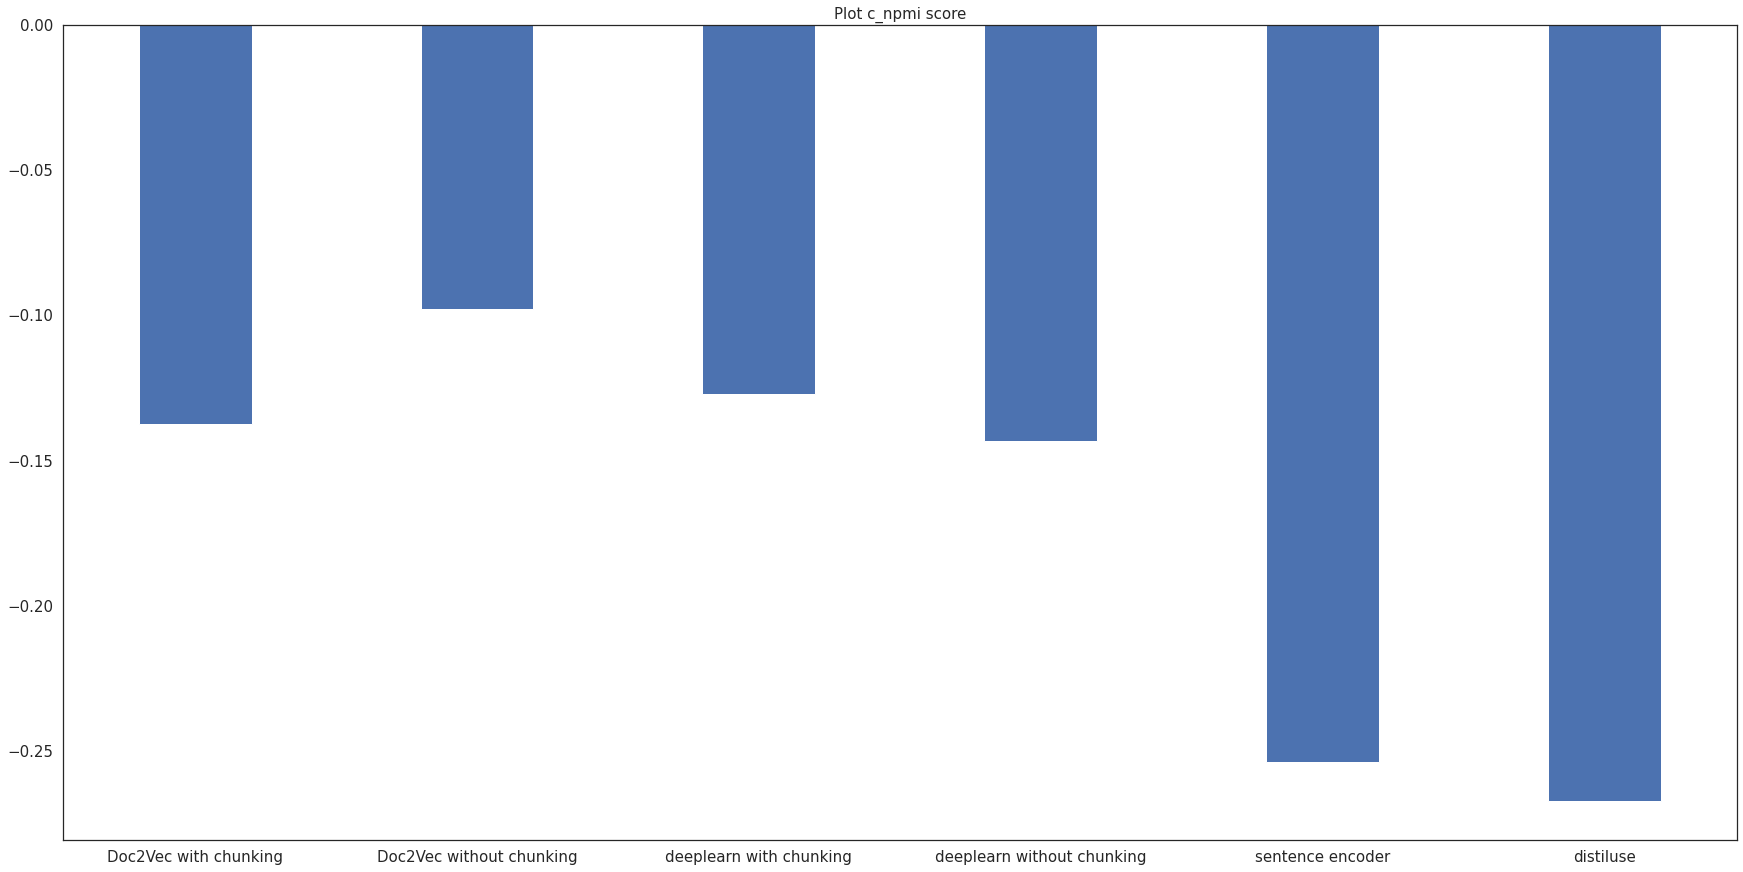

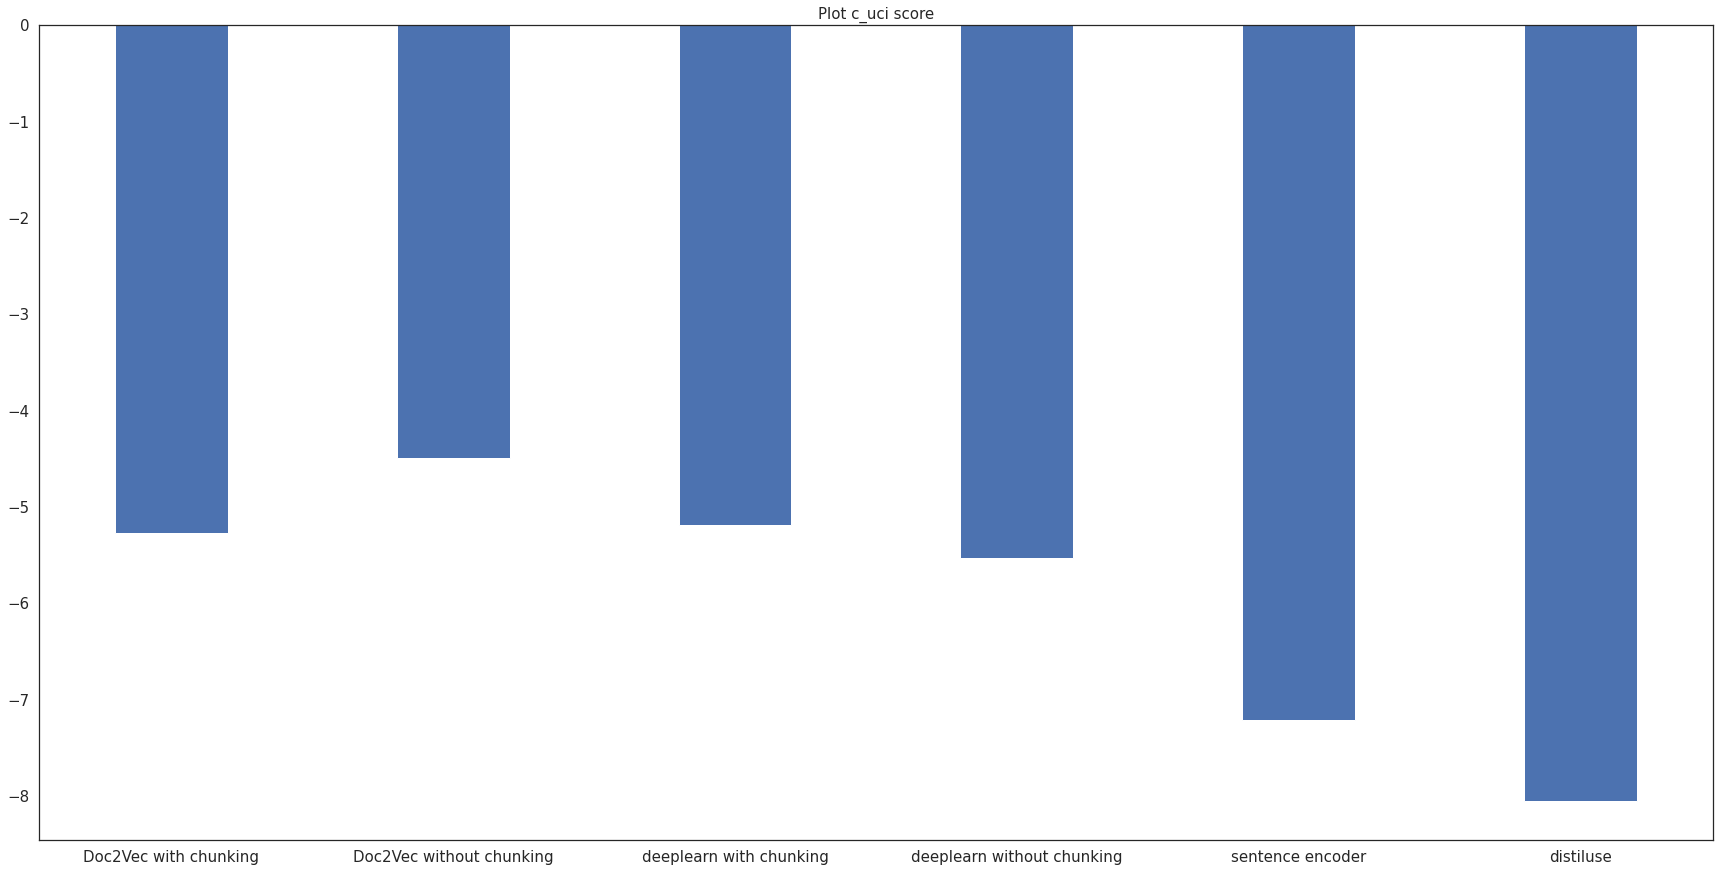

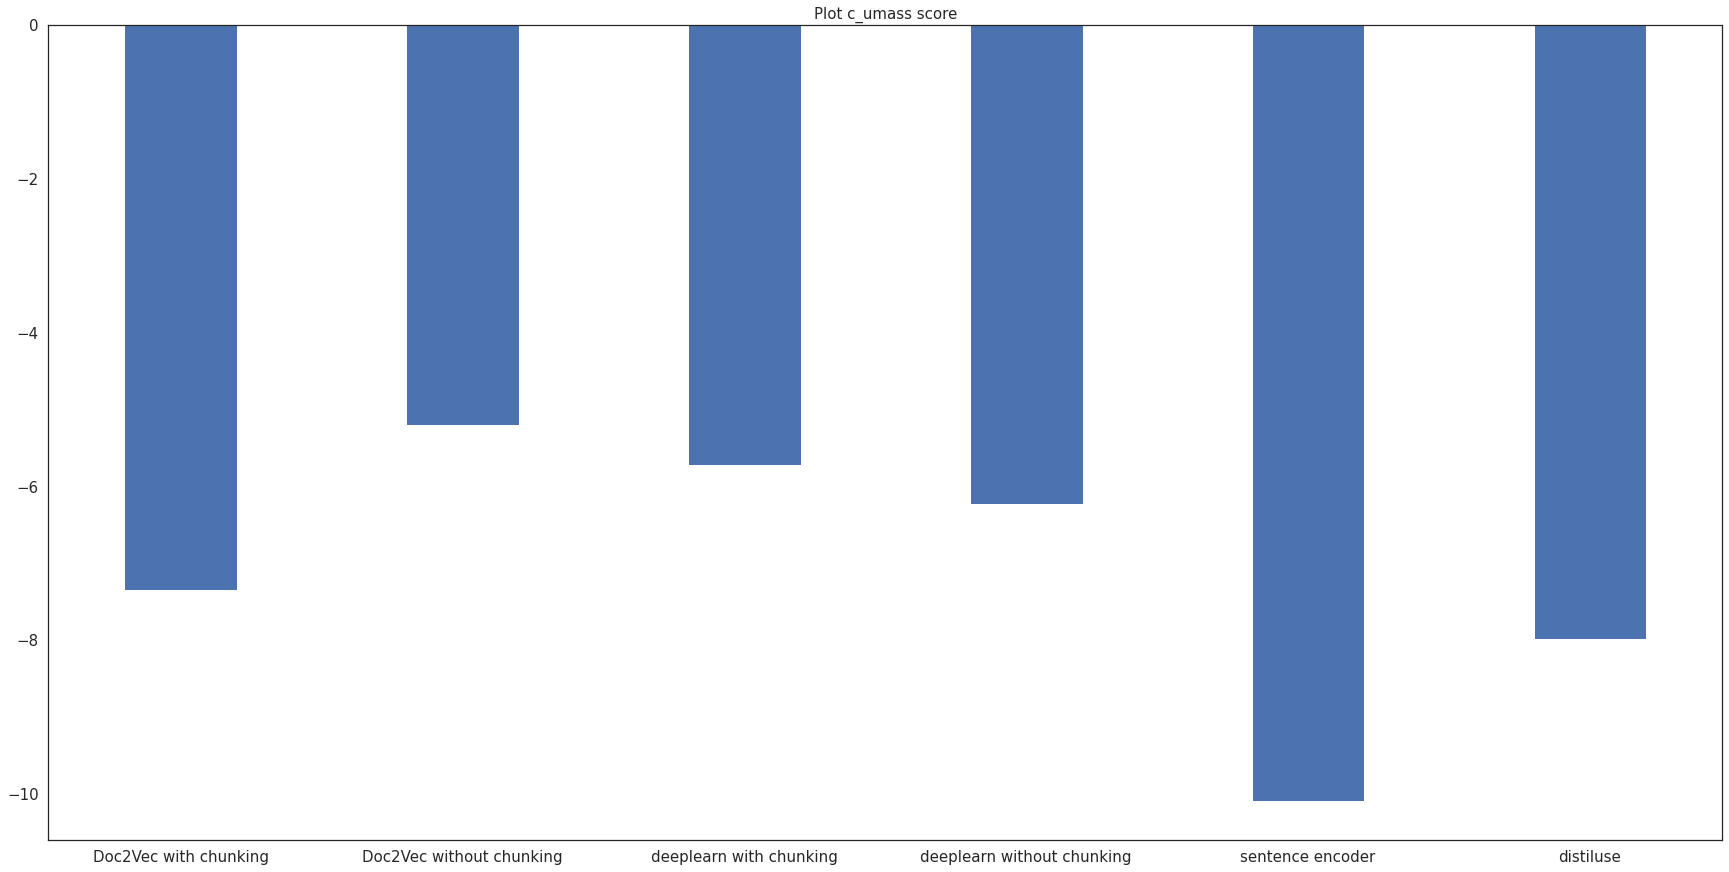

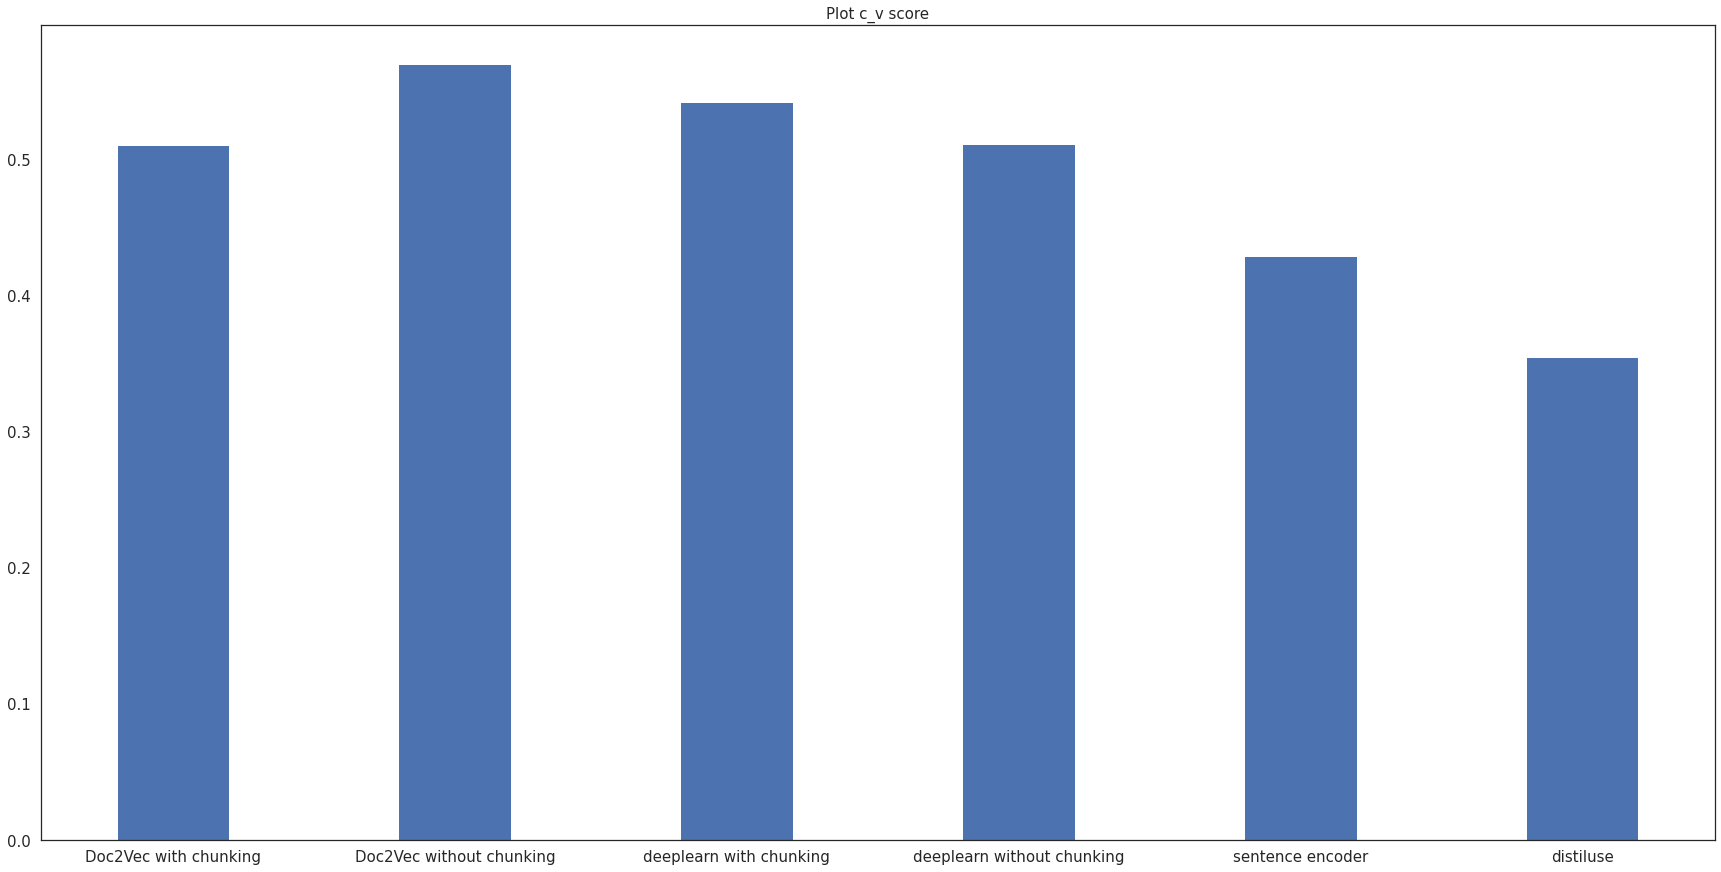

In [ ]:
for i,m in enumerate(metrics):
  ypoints = []
  for k in tests_done:
    ypoints.append(k[m])
  fig, ax = plt.subplots(figsize=(30, 15))
  if m == "diversity" or m == "irbo":
    ax.bar(test_str, ypoints, label=ypoints, log=True, width=0.4)
  else:
    ax.bar(test_str, ypoints, label=ypoints, width=0.4)

  plt.yticks(fontsize=15)
  plt.xticks(fontsize=15)
  ax.set_title("Plot {} score".format(m), fontsize=15)
  ax.set_label("Versions tested of Top2Vec")
  #ax.set_ylabel("Metric score: {}".format(m))

  plt.show()
  fig.savefig(top2vec_plot_path+m+'.png')

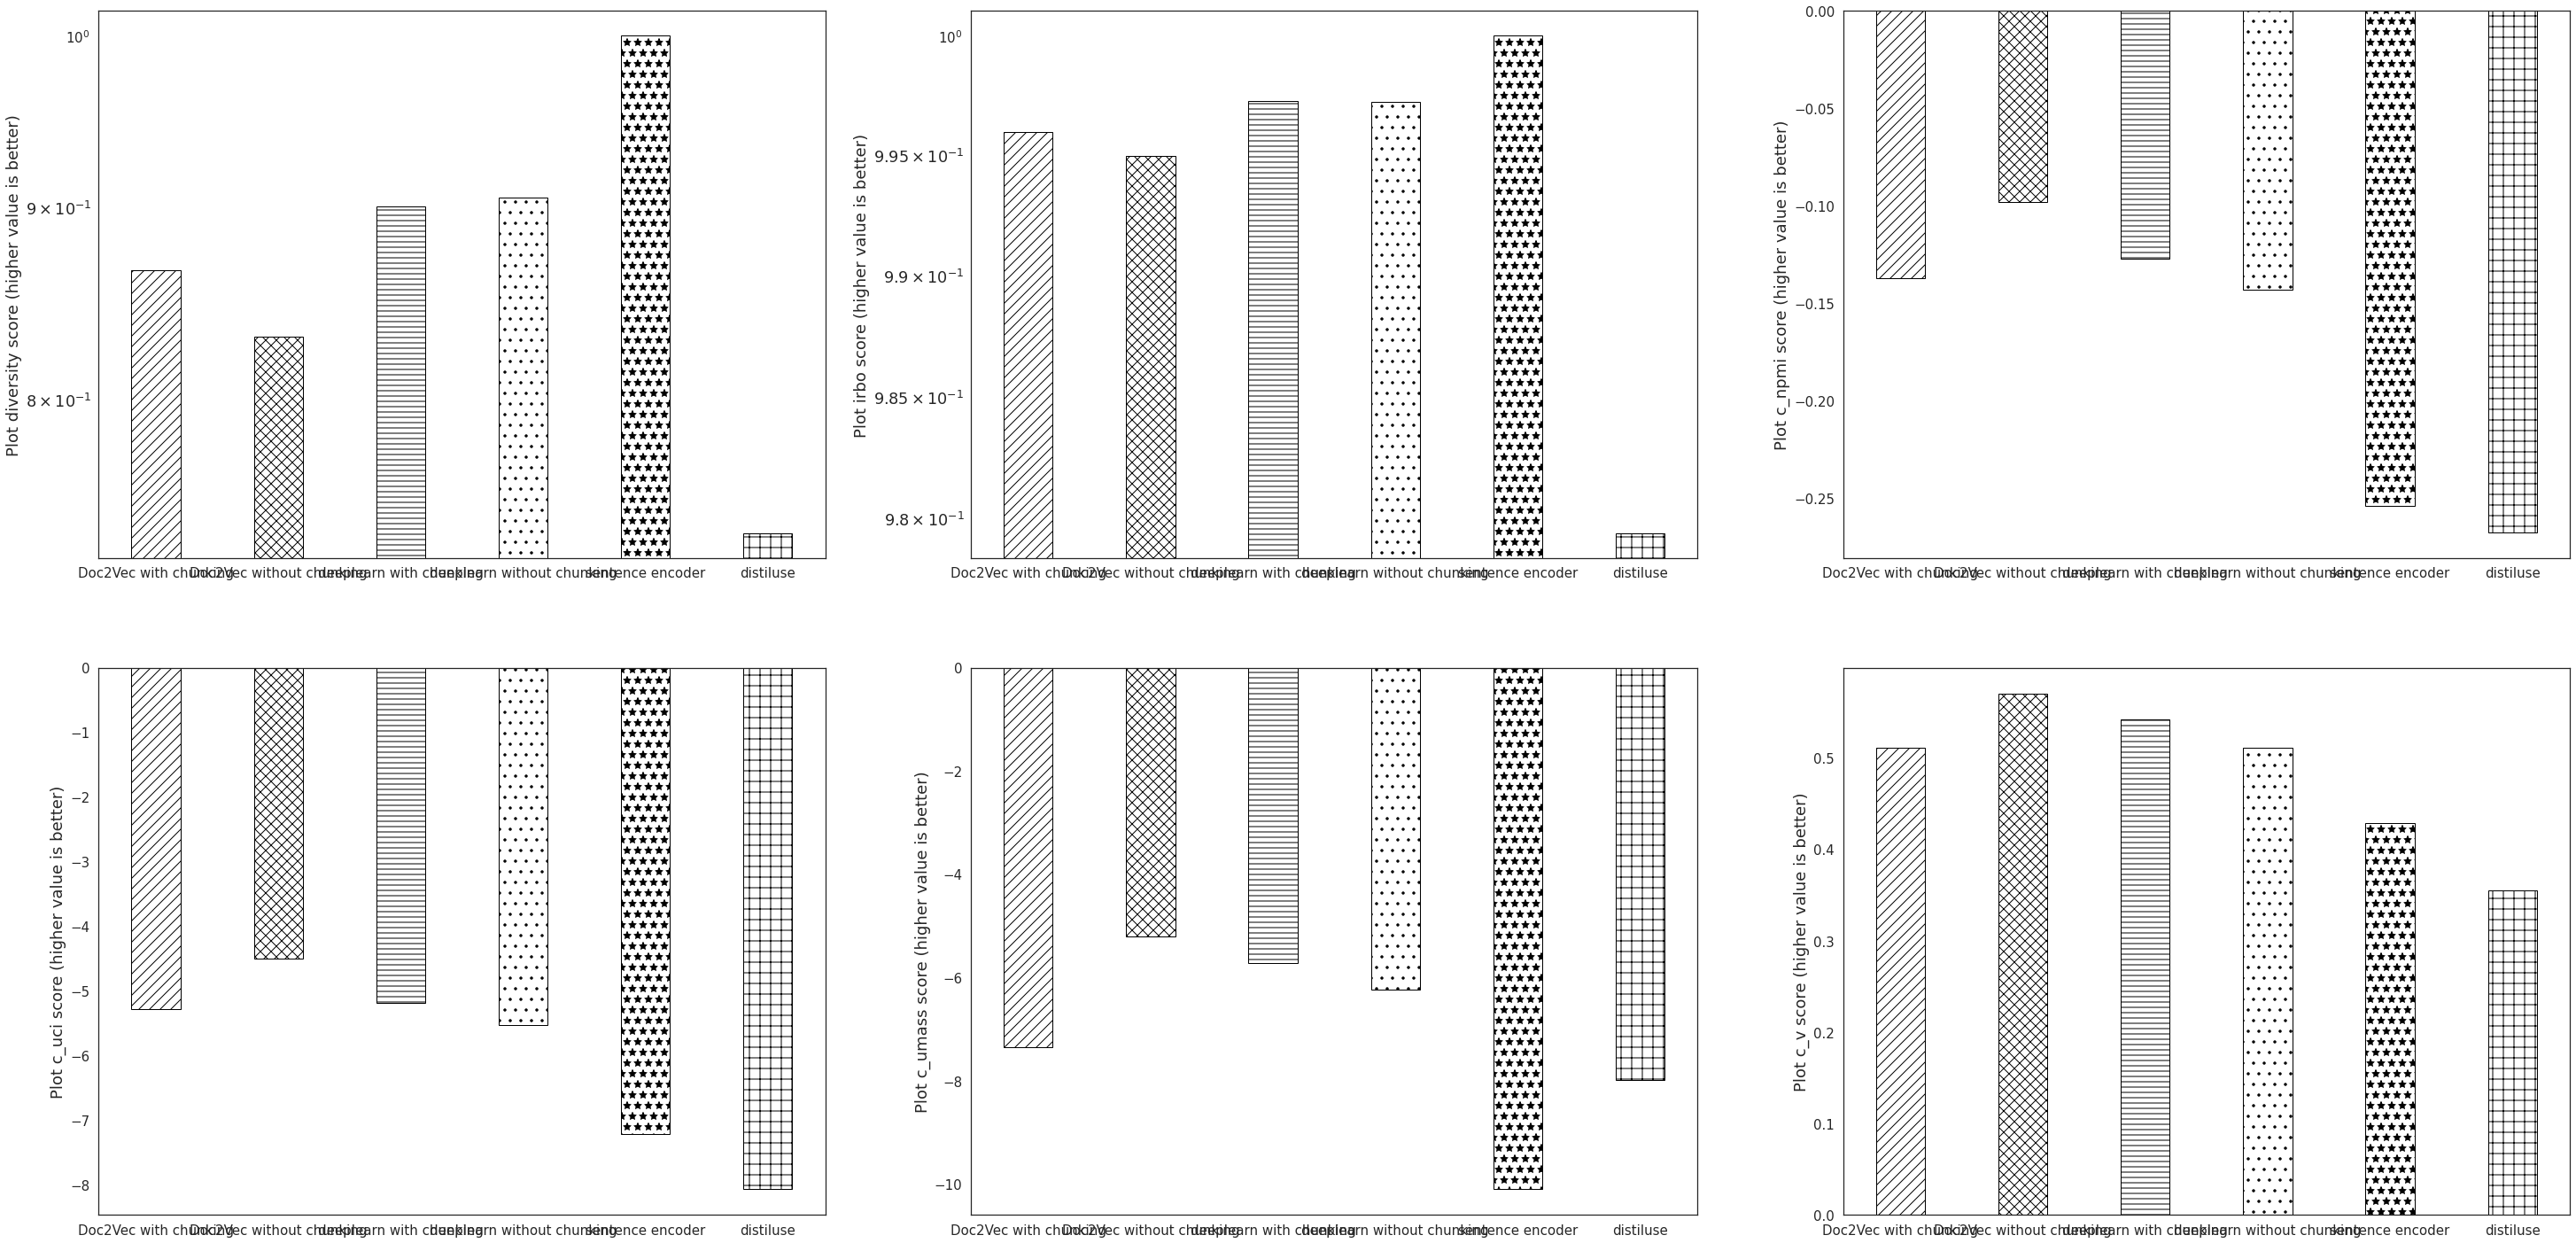

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(50,25))
pos = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]
hatches = ["//", "xx", "--", ".", "*", "+"]
legend_elements = []
for i in hatches:
  legend_elements.append(Patch(facecolor='b', edgecolor='black', alpha=0.9, hatch=i))

for i,m in enumerate(metrics):
  ypoints = []
  for k in tests_done:
    ypoints.append(k[m])
  p = pos[i]
  axs[p[0], p[1]].plot(figsize=(8, 4))
  if m == "diversity" or m == "irbo":
    bars = axs[p[0], p[1]].bar(test_str, ypoints, label=ypoints, log=True,  width=0.4)
  else:
    bars = axs[p[0], p[1]].bar(test_str, ypoints, label=ypoints,  width=0.4)
  
  for i in range(len(bars)):
    bars[i].set(hatch = hatches[i], color="w", edgecolor= "black")

  plt.sca(axs[p[0], p[1]])
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  axs[p[0], p[1]].set_ylabel("Plot {} score (higher value is better)".format(m), fontsize=18)
  #axs[p[0], p[1]].set_xlabel("Versions tested of Top2Vec", fontsize=18)
  #axs[p[0], p[1]].set_ylabel("Metric score".format(m))
  #print(hatches, type(hatches), test_str, type(test_str))
  #axs[p[0], p[1]].legend(handles=legend_elements, labels=test_str)

fig.savefig(top2vec_plot_path+'all_metrics.png')

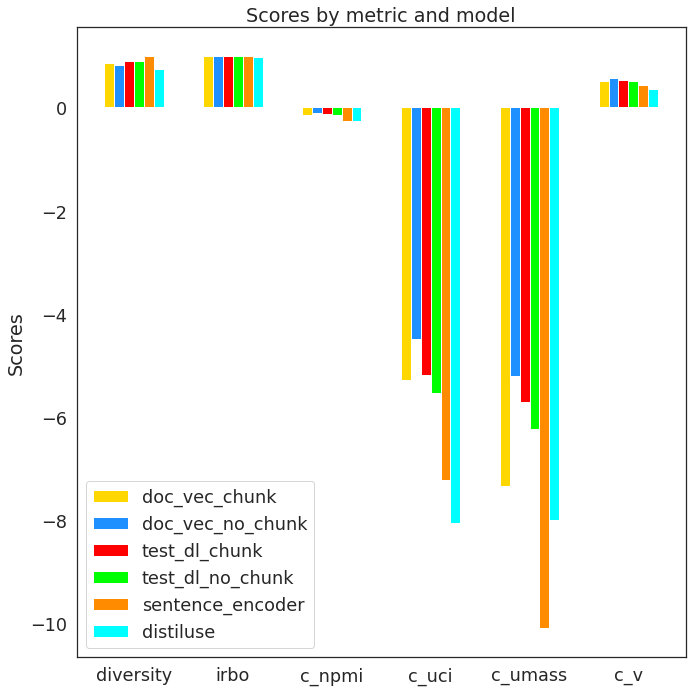

In [ ]:
labels = ["doc_vec_chunk", "doc_vec_no_chunk", "test_dl_chunk", "test_dl_no_chunk", "sentence_encoder", "distiluse"]
doc_vec_chunk_v = [doc_vec_chunk[m] for m in metrics]
doc_vec_no_chunk_v = [doc_vec_no_chunk[m] for m in metrics]
test_dl_chunk_v = [test_dl_chunk[m] for m in metrics] 
test_dl_no_chunk_v = [test_dl_no_chunk[m] for m in metrics]
sentence_encoder_v = [sentence_encoder[m] for m in metrics] 
distiluse_v = [distiluse[m] for m in metrics]
tests = [doc_vec_chunk_v, doc_vec_no_chunk_v, test_dl_chunk_v, test_dl_no_chunk_v, sentence_encoder_v, distiluse_v]

x = np.arange(len(labels))  # the label locations
width = 0.10  # the width of the bars
colors = ["gold", "dodgerblue", "red", "lime", "darkorange", "cyan"]
fig, ax = plt.subplots(figsize=(10, 10))

rects = []
for i,e in enumerate(tests):
  rects.append(ax.bar(x - (width*(2.5-i)), e, width, label=labels[i], color=colors[i])) #, log=True

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by metric and model')
ax.set_xticks(x, labels)
ax.legend()

for r in rects:
  ax.set_xticklabels(metrics)

fig.tight_layout()

plt.show()

In [ ]:
# for t,t_s in zip(tests_done, test_str):
#   print(t_s, t["num_topics"])

## Comparisons of the methods

### Importing and pre-processing data

In [6]:
results_path = "/content/drive/MyDrive/Tesi/results_csv/"

In [7]:
keys = ["dataset", "c_uci", "c_v", "c_umass", "c_npmi",	"topic_diversity", "#topics",	"irbo"]
metrics = ["topic_diversity", "irbo", "c_npmi", "c_uci", "c_umass", "c_v"]
models = ["LDA", "Top2Vec", "NMF", "BERTopic", "RoBERTa", "CTM", "ETM"]
datasets = ["ATE", "TAT", "ET", "20NG", "TP"]
data_dict = {"AirBnB":"ATE", "TripAdvisor":"TAT", "EasyTour":"ET", "20NewsGroup":"20NG", "TourPedia":"TP"}
colors = ["black", "dimgray", "darkgrey", "gainsboro", "white", "silver", "whitesmoke"]

In [8]:
results = dict()
csv_files = [(f,join(results_path, f)) for f in listdir(results_path) if isfile(join(results_path, f))]
datasets_from_csv = set()
for f in csv_files:
  reader = csv.reader(open(f[1], 'r'))
  next(reader, None)
  for m in models:
    if m in f[1]:
      results[m] = dict()
      break
  #results[f[0]] = dict()
  for row in reader:
    for k,v in zip(keys, row):
      if k != "dataset":
        results[m][dataset_csv][k] = float(v)
      else:
        results[m][data_dict[v]] = dict()
        dataset_csv = data_dict[v]
        datasets_from_csv.add(v)
  print("File: {} ... done".format(f[1]))

datasets_from_csv = list(datasets_from_csv)

File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - LDA.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - NMF.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - ETM.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - BERTopic Raw Data.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - RoBERTa Raw Data.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - CTM.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - Top2Vec Raw Data11.csv ... done


In [9]:
#datasets_from_csv

In [10]:
results

{'LDA': {'ATE': {'c_uci': -6.56,
   'c_v': 0.45,
   'c_umass': -8.45,
   'c_npmi': -0.19,
   'topic_diversity': 0.87,
   '#topics': 14.0,
   'irbo': 0.98},
  'TAT': {'c_uci': -6.68,
   'c_v': 0.42,
   'c_umass': -8.68,
   'c_npmi': -0.19,
   'topic_diversity': 0.94,
   '#topics': 16.0,
   'irbo': 0.99},
  'ET': {'c_uci': -0.11,
   'c_v': 0.37,
   'c_umass': -1.65,
   'c_npmi': -0.01,
   'topic_diversity': 0.21,
   '#topics': 22.0,
   'irbo': 0.56},
  '20NG': {'c_uci': -6.23,
   'c_v': 0.34,
   'c_umass': -5.92,
   'c_npmi': -0.21,
   'topic_diversity': 0.6,
   '#topics': 111.0,
   'irbo': 0.87},
  'TP': {'c_uci': -1.06,
   'c_v': 0.45,
   'c_umass': -3.62,
   'c_npmi': -0.03,
   'topic_diversity': 0.38,
   '#topics': 14.0,
   'irbo': 0.7}},
 'NMF': {'ATE': {'c_uci': 0.01,
   'c_v': 0.7,
   'c_umass': -2.09,
   'c_npmi': 0.12,
   'topic_diversity': 0.83,
   '#topics': 14.0,
   'irbo': 0.98},
  'TAT': {'c_uci': 0.59,
   'c_v': 0.79,
   'c_umass': -1.7,
   'c_npmi': 0.21,
   'topic_divers

In [11]:
# Create dataframe for seaborn
r = []
csv_files = [(f,join(results_path, f)) for f in listdir(results_path) if isfile(join(results_path, f))]

for f in csv_files:
  reader = csv.reader(open(f[1], 'r'))
  next(reader, None)
  for m in models:
    if m in f[1]:
      model_used = m
      break
  for row in reader:
    row[-1] = model_used
    if data_dict[row[0]]:
      row[0] = data_dict[row[0]]
    try:
      row.remove('')
      r.append(row)
    except:
      r.append(row)
      continue
  print("File: {} ... done".format(f[1]))

results_df = pd.DataFrame(r, columns = ["dataset", "c_uci", "c_v", "c_umass", "c_npmi",	"topic_diversity", "#topics",	"irbo", "model"])
results_df[metrics] = results_df[metrics].apply(pd.to_numeric)

File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - LDA.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - NMF.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - ETM.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - BERTopic Raw Data.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - RoBERTa Raw Data.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - CTM.csv ... done
File: /content/drive/MyDrive/Tesi/results_csv/Result_Sheet - Top2Vec Raw Data11.csv ... done


In [12]:
def model_sorter(column):
    correspondence = {model: order for order, model in enumerate(models)}
    return column.map(correspondence)

results_df = results_df.sort_values(by='model', key=model_sorter)

In [13]:
results_df

,dataset,c_uci,c_v,c_umass,c_npmi,topic_diversity,#topics,irbo,model
0,ATE,-6.56,0.45,-8.45,-0.190,0.87,14,0.980,LDA
1,TAT,-6.68,0.42,-8.68,-0.190,0.94,16,0.990,LDA
2,ET,-0.11,0.37,-1.65,-0.010,0.21,22,0.560,LDA
3,20NG,-6.23,0.34,-5.92,-0.210,0.60,111,0.870,LDA
4,TP,-1.06,0.45,-3.62,-0.030,0.38,14,0.700,LDA
32,ET,-4.57,0.56,-5.38,-0.100,0.84,50.1,0.995,Top2Vec
31,TAT,-3.42,0.70,-1.17,-0.010,0.94,6,0.980,Top2Vec
30,ATE,-3.42,0.62,-1.52,-0.060,0.92,6,0.980,Top2Vec
33,20NG,-2.72,0.64,-2.74,-0.020,0.91,83,0.998,Top2Vec
34,TP,-6.72,0.35,-8.10,-0.220,0.61,40.8,0.970,Top2Vec


### Radar Charts

In [14]:
dash_styles = ("solid", "dot", "dash", "longdash", "dashdot", "longdashdot")
markers = (0,107,13,122,130,135)

In [15]:
# Set use_colors to False to have plots in shades of gray
def radar_chart_metrics(use_colors=False, remove_diversity=False, save_plots=False, use_dash=False):

  min_df = results_df.min()
  max_df = results_df.max()
  if remove_diversity:
    metrics_radar_chart = list(filter(lambda x: x != "irbo" and x != "topic_diversity", metrics))
  else:
    metrics_radar_chart = metrics

  for i in metrics_radar_chart:
    min_value = min_df[i]
    max_value = max_df[i]

    fig = go.Figure()

    for m,c,style in zip(models,colors,dash_styles):
      v = []
      for d in datasets:
        v.append(results[m][d][i])

      if use_colors:
        fig.add_trace(go.Scatterpolar(
              r=v,
              theta=datasets,
              fill='none', #toself to color area
              name=m
        ))
      else:
        if use_dash:
          line_style = {"color":c, "dash":style}
        else:
          line_style = {"color":c}
        fig.add_trace(go.Scatterpolar(
              r=v,
              theta=datasets,
              fill='none', #toself to color area
              name=m,
              line = line_style
        ))

    fig.update_layout(
      #title = "Comparison for {} metric".format(i),
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[min_value, max_value]
        )),
      showlegend=True
    )

    fig.show()
    if save_plots:
      if use_colors:
        plot_path = radar_chart_path + "Metrics/radar_chart_colored_"+ i + ".png"
      elif use_dash:
        plot_path = radar_chart_path + "Metrics/radar_chart_dashedLines_"+ i + ".png"
      else:
        plot_path = radar_chart_path + "Metrics/radar_chart_"+ i + ".png"
      fig.write_image(plot_path)

radar_chart_metrics(use_colors=True, save_plots=True, use_dash=False)
radar_chart_metrics(use_colors=False, save_plots=True, use_dash=False)
radar_chart_metrics(use_colors=False, save_plots=True, use_dash=True)

In [16]:
# Set use_colors to False to have plots in shades of gray
def radar_chart_dataset(use_colors=False, remove_diversity=True, save_plots=False, use_dash=False):

  if remove_diversity:
    metrics_radar_chart = list(filter(lambda x: x != "irbo" and x != "topic_diversity", metrics))
  else:
    metrics_radar_chart = metrics

  for d in datasets:
    min_value = results_df[results_df.dataset==d].min(axis=1).min()
    max_value = results_df[results_df.dataset==d].max(axis=1).max()

    fig = go.Figure()

    for m,c,style in zip(models,colors,dash_styles):
      v = []
      for i in metrics_radar_chart:
        v.append(results[m][d][i])

      if use_colors:
        #mark = go.scatterpolar.Marker.symbol = 107
        fig.add_trace(go.Scatterpolar(
              r=v,
              theta=metrics_radar_chart,
              fill='none', #toself to color area
              name=m
        ))
      else:
        if use_dash:
          line_style = {"color":c, "dash":style}
        else:
          line_style = {"color":c}
        fig.add_trace(go.Scatterpolar(
              r=v,
              theta=metrics_radar_chart,
              fill='none', #toself to color area
              name=m,
              line = line_style
        ))
    fig.update_layout(
      #title = "Comparison for {} dataset".format(d),
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[min_value, max_value]
        )),
      showlegend=True
    )

    fig.show(renderer="colab")
    if save_plots:
      if use_colors:
        plot_path = radar_chart_path + "Datasets/radar_chart_colored_"+ d + ".png"
      elif use_dash:
        plot_path = radar_chart_path + "Datasets/radar_chart_dashedLines_"+ d + ".png"
      else:
        plot_path = radar_chart_path + "Datasets/radar_chart_"+ d + ".png"
      fig.write_image(plot_path)

radar_chart_dataset(use_colors=True, save_plots=True, use_dash=False)
radar_chart_dataset(use_colors=False, save_plots=True, use_dash=False)
radar_chart_dataset(use_colors=False, save_plots=True, use_dash=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



### Bar Charts

In [ ]:
#colors = ["black", "dimgray", "darkgrey", "gainsboro", "white", "silver", "whitesmoke"]

sns.set(style='white', rc={'figure.figsize':(12,8)}, font_scale=1.6)
m = "c_uci"
for i,m in enumerate(metrics):
  plt.figure()
  plt.margins(x=0.1)
  if m not in ["topic_diversity", "irbo"]: #coherence
    s = sns.barplot(y="dataset", x=m, hue="model", data=results_df, orient="h", palette = colors, edgecolor=".5")
    plt.ylabel("Datasets")#, fontdict={"fontsize":15})
    plt.xlabel("Coherence value ({})".format(m))#, fontdict={"fontsize":15})
  else: # diversity
    s = sns.barplot(y=m, x="dataset", hue="model", data=results_df, orient="v", palette = colors, edgecolor=".5")
    if m == "irbo":
      plt.ylabel("Topic diversity ({})".format(m))#, fontdict={"fontsize":15})
    else:
      plt.ylabel("Topic diversity")#, fontdict={"fontsize":15})
    plt.xlabel("Datasets")#, fontdict={"fontsize":15})
    
  # add bar values
  # for bars_group in s.containers:
  #   s.bar_label(bars_group, padding=3, fontsize=10)

  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))#, fontsize=15)
  sns.despine()
  plt.tight_layout()
  #plt.savefig(plot_path+m+'_seaborn.png')

### Line Charts

In [ ]:
sns.set(style='white', rc={'figure.figsize':(12,8)})
m = "c_uci"
for i,m in enumerate(metrics):
  plt.figure()
  s = sns.lineplot(y=m, x="dataset", hue="model", data=results_df)
  plt.ylabel("Coherence value ({})".format(m), fontdict={"fontsize":15})
  plt.xlabel("Datasets", fontdict={"fontsize":15})
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
  plt.tight_layout()
  #plt.savefig(plot_path+m+'_lineplot.png')